In [1]:
import itertools
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import keras
from keras.models import Model
from keras.datasets import cifar10
from keras.layers import Input, Dense, Conv2D, Dropout, Flatten, GlobalMaxPooling2D

from sklearn.metrics import confusion_matrix

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255, x_test / 255

x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [3]:
y_train, y_test = y_train.flatten(), y_test.flatten()

y_train.shape, y_test.shape

((50000,), (10000,))

In [4]:
K = len(np.unique(y_test))
K

10

In [5]:
i = Input(shape=x_train[0].shape)

x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Flatten()(x)
x = Dropout(0.5)(x)

x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(K, activation='softmax')(x)

model = Model(inputs=i, outputs=x)

In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 12s 6ms/step - loss: 1.6053 - accuracy: 0.4087 - val_loss: 1.3117 - val_accuracy: 0.5245
Epoch 2/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3284 - accuracy: 0.5203 - val_loss: 1.1530 - val_accuracy: 0.5872
Epoch 3/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2584 - accuracy: 0.5561 - val_loss: 1.1418 - val_accuracy: 0.5962
Epoch 4/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2916 - accuracy: 0.5606 - val_loss: 1.1439 - val_accuracy: 0.5919
Epoch 5/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4617 - accuracy: 0.5490 - val_loss: 1.3688 - val_accuracy: 0.5383
Epoch 6/15
1560/1563 [============================>.] - ETA: 0s - loss: 1.7063 - accuracy: 0.5374

KeyboardInterrupt: 

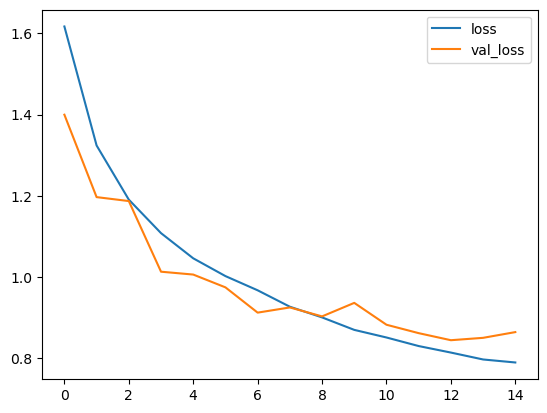

In [32]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

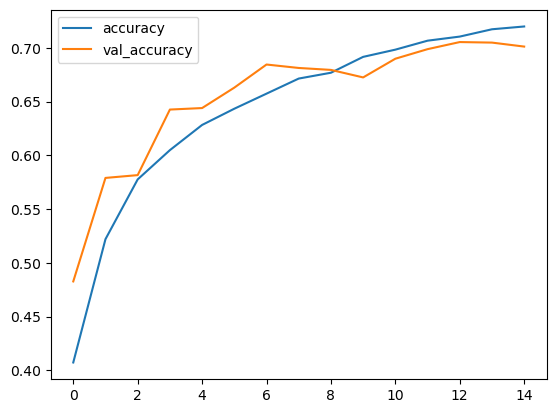

In [33]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[683  20  47  10  24   1  10   6 163  36]
 [ 11 854   4   9   4   0   2   0  29  87]
 [ 67  12 566  45 126  44  51  32  37  20]
 [ 19  12  79 470 117 108  92  40  35  28]
 [ 23   5  46  54 716  15  43  71  20   7]
 [ 10   7  69 201  74 499  51  56  24   9]
 [  7  11  49  42  82   9 779   5  10   6]
 [ 17   5  35  32  72  33  11 759  10  26]
 [ 21  24  10   9  13   1   6   4 882  30]
 [ 25  89   4   7   9   2   7  15  38 804]]


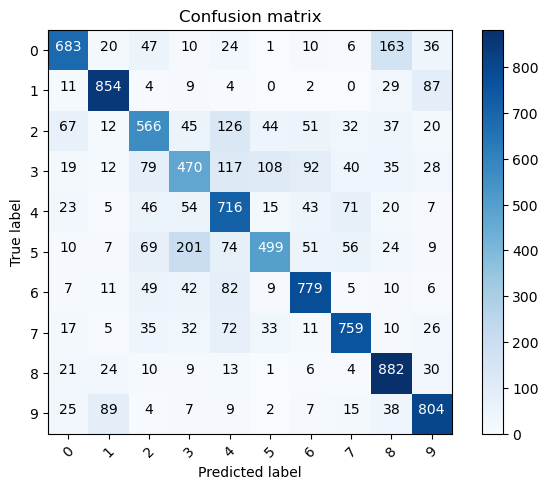

In [ ]:
def plot_confusion_matrix(
    cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues
):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')

    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment='center',
            color='white' if cm[i, j] > thresh else 'black',
        )

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [35]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split(
    '\n'
)

Text(0.5, 1.0, 'True label: cat, Predicted: deer')

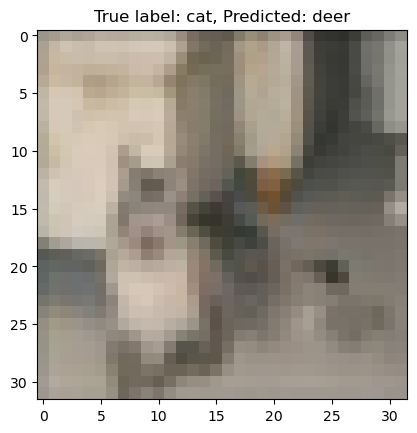

In [39]:
misclassified_index = np.where(p_test != y_test)[0]

i = np.random.choice(misclassified_index)
plt.imshow(x_test[i], cmap='gray')
plt.title(f'True label: {labels[y_test[i]]}, Predicted: {labels[p_test[i]]}')